Time dependent Schrödinger equation
==================================

We want to describe an electron wavefunction by a wavepacket
$\psi (x,y)$ that is a function of position $x$ and time $t$. We assume
that the electron is initially localized around $x_0$, and model this by
a Gaussian multiplying a plane wave:
$$\psi(x,t=0)=\exp{\left[-\frac{1}{2}\left(\frac{x-x_0}{\sigma _0}
\right)^2\right ]} e^{ik_0x}
$$

This wave function does not correspond to an electron with a well
defined momentum. However, if the width of the Gaussian $\sigma _0$ is
made very large, the electron gets spread over a sufficiently large
region of space and can be considered as a plane wave with momentum
$k_0$ with a slowly varying amplitude.

The behavior of this wave packet as a function of time is described by
the time-dependent Schröedinger equation (here in 1d):

$$i\frac{\partial \psi}{\partial t}=H\psi(x,t).$$ 

$H$ is the Hamiltonian operator:

$$H=-\frac{1}{2m}\frac{\partial ^2}{\partial x^2}+V(x),$$ 

where $V(x)$ is a time independent potential. The
Hamiltonian is chosen to be real. we have picked teh energy units such
that $\hbar=1$, and from now on, we will pick mass units such that
$2m=1$ to make equations simpler.

Scrhödinger’s equation is obviously a PDE, and we can use
generalizations of the techniques learned in previous sections to solve
it. The main observation is that this time we have to deal with complex
numbers, and the function $\psi (x,y)$ has real and imaginary parts:
$$\psi (x,t) = R(x,t)+iI(x,t).$$ However, is this section we will
present an alternative method that makes the quantum mechanical nature
of this problem more transparent.

The time-evolution operator
---------------------------

The Scrödinger equation (\[time\]) can be integrated in a formal sense
to obtain: 
$$\psi(x,t)=U(t)\psi(x,t=0)=e^{-iHt}\psi(x,t).$$ 

From here we deduce that the wave function can be
evolved forward in time by applying the time-evolution operator
$U(t)=\exp{-iHt}$: $$\psi(t+\Delta t)= e^{-iH\delta t}\psi(t).$$
Likewise, the inverse of the time-evolution operator moves the wave
function back in time: $$\psi(t-\Delta t)=e^{iH\Delta t}\psi(t),$$ where
we have use the property $$U^{-1}(t)=U(-t).$$ Although it would be nice
to have an algorithm based on the direct application of $U$, it has been
shown that this is not stable. Hence, we apply the following relation:
$$\psi(t+\Delta t)=\psi(t-\Delta t)+\left[e^{-iH\Delta t}-e^{iH\Delta
t}\right]\psi(t).$$ Now, the derivatives with recpect to $x$ can be
approximated by 

$$\begin{aligned}
\frac{\partial \psi}{\partial t}
&\sim& \frac{\psi(x,t+\Delta t)-\psi(x, t)}{\Delta t}, \\
\frac{\partial ^2 \psi}{\partial x^2} &\sim& \frac{\psi(x+\Delta  %
x,t)+\psi(x-\Delta x,t)-2\psi(x,t)}{(\Delta x)^2}.
\end{aligned}$$ 

The time evolution operator is
approximated by: $$U(\Delta t)=e^{-iH\Delta t} \sim 1+iH\Delta t.$$
Replacing the expression (\[hami\]) for $H$, we obtain:

$$\psi(x,t+\Delta t)=\psi(x,t)-i[(2\alpha+\Delta t
V(x))\psi(x,t)-\alpha(\psi(x+\Delta x,t)+\psi(x-\Delta x,t))],
$$ 

with $\alpha=\frac{\Delta t}{(\Delta x)^2}$. The
probability of finding an electron at $(x,t)$ is given by
$|\psi(x,t)|^2$. This equations do no conserve this probability exactly,
but the error is of the order of $(\Delta t)^2$. The convergence can be
determined by using smaller steps.

We can write this expression explicitly for the real and imaginary parts, becoming:

$$\begin{aligned}
\mathrm{Im} \psi(x, t + \Delta t) = \mathrm{Im} \psi(x, t) + \alpha \mathrm{Re} \psi (x + \Delta x, t) + \alpha \mathrm{Re}\psi(x − \Delta x, t) − (2\alpha + \Delta t V (x)) \mathrm{Re} \psi(x, t) \\
\mathrm{Re} \psi(x, t + \Delta t) = \mathrm{Re} \psi(x, t) −  \alpha \mathrm{Im} \psi (x + \Delta x, t) − \alpha \mathrm{Im} \psi (x − \Delta x, t) + (2\alpha + \Delta tV (x)) \mathrm{Im} \psi(x, t)
\end{aligned}$$


Notice the symmetry between these equations a: while the calculation of the imaginary part of the wave function at the later time involves a weighted average of the real part of the wave function at di erent positions from the earlier time, the calculation of the real part involves a weighted average of the imaginary part for di erent positions at the earlier time. This intermixing of the real and imaginary parts of the wave function may seem a bit strange, but remember that this situation is a direct result of our breaking up the wave function into its real and imaginary parts in the first place.




### Exercise 8.1: Harmonic Potential 
Simulate a Gaussian wave-packet moving along the $x$ axis in a harmonic potential

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import math
import matplotlib.animation as animation
from IPython.display import HTML


lx=20
dx = 0.04
nx = int(lx/dx)
dt = dx**2/20.
V0 = 60
alpha = dt/dx**2

fig = pyplot.figure()
ax = pyplot.axes(xlim=(0, lx), ylim=(0, 2), xlabel='x', ylabel='|Psi|^2')
points, = ax.plot([], [], marker='', linestyle='-', lw=3)

psi0_r = np.zeros(nx+1)
psi0_i = np.zeros(nx+1)

x = np.arange(0, lx+dx, dx)

#Define your potential 
V = np.zeros(nx+1)
V = V0*(x-lx/2)**2

#Initial conditions: wave packet
sigma2 = 0.5**2
k0 = np.pi*10.5
x0 = lx/2
for ix in range(0,nx):
    psi0_r[ix] = math.exp(-0.5*((ix*dx-x0)**2)/sigma2)*math.cos(k0*ix*dx)
    psi0_i[ix] = math.exp(-0.5*((ix*dx-x0)**2)/sigma2)*math.sin(k0*ix*dx)
    
def solve(i):
    global psi0_r, psi0_i

    for ix in range(1,nx-2):
        psi0_i[ix]=psi0_i[ix]+alpha*psi0_r[ix+1]+alpha*psi0_r[ix-1]-(2.*alpha+dt*V[ix])*psi0_r[ix]
    for ix in range(1,nx-2):
        psi0_r[ix]=psi0_r[ix]-alpha*psi0_i[ix+1]-alpha*psi0_i[ix-1]+(2.*alpha+dt*V[ix])*psi0_i[ix]
        
    points.set_data(x,psi0_r**2 + psi0_i**2)
    return (points,)


#for i in range(2000):
#    solve(i)
      
#pyplot.plot(x,psi0_r**2+psi0_i**2);


anim = animation.FuncAnimation(fig, solve, frames = 8000, interval=50)

HTML(anim.to_jshtml())            



Animation size has reached 20973919 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


### Exercise 8.2: Potential barrier ###
Simulate a Gaussian wave-packet moving along the x axis passing through a potential barrier

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML


fig = pyplot.figure()
ax = pyplot.axes(xlim=(0, lx), ylim=(0, 2), xlabel='x', ylabel='$|\Psi|^2$')
points, = ax.plot([], [], marker='', linestyle='-', lw=3)

x0=6

for ix in range(0,nx):
    psi0_r[ix] = math.exp(-0.5*((ix*dx-x0)**2)/sigma2)*math.cos(k0*ix*dx)
    psi0_i[ix] = math.exp(-0.5*((ix*dx-x0)**2)/sigma2)*math.sin(k0*ix*dx)

x = np.arange(0, lx+dx, dx)
V = np.zeros(nx+1)

for ix in range(nx//2-20,nx//2+20):
    V[ix]=2000.
                                               
def solve(i):
    global psi0_r, psi0_i

    psi0_r[1:-1] = psi0_r[1:-1]- alpha*(psi0_i[2:]+psi0_i[:-2]-2*psi0_i[1:-1])+dt*V[1:-1]*psi0_i[1:-1] 
    psi0_i[1:-1] = psi0_i[1:-1]+ alpha*(psi0_r[2:]+psi0_r[:-2]-2*psi0_r[1:-1])-dt*V[1:-1]*psi0_r[1:-1] 

    points.set_data(x,psi0_r**2 + psi0_i**2)
    return points


#for i in range(2000):
#    solve(i)
      
#pyplot.plot(x,psi0_r**2+psi0_i**2);


anim = animation.FuncAnimation(fig, solve, frames = 2000, interval=10)

HTML(anim.to_jshtml())            




### Exercise 8.2: Single-slit diffraction 
Young’s single-slit experiment consists of a wave passing though a small
slit, which causes the emerging wavelets to intefere with eachother
forming a diffraction pattern. In quantum mechanics, where particles are
represented by probabilities, and probabilities by wave packets, it
means that the same phenomenon should occur when a particle (electron,
neutron) passes though a small slit. Consider a wave packet of initial
width 3 incident on a slit of width 5, and plot the probability density
$|\psi ^2|$ as the packet crosses the slit. Generalize the
time-evolution equation (\[time\_diff\]) for 2 dimensions. Model the
slit with a potential wall:
$$V(x,y)=100 \,\,\,\,\,\ \mathrm{for}\,\,x=10,|y|\geq 2.5.$$

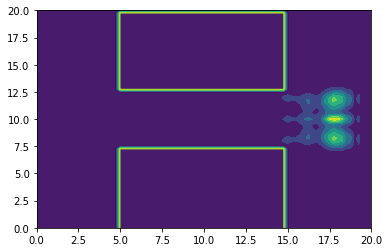

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import math

lx      = 20                            #Box length in x
ly      = 20                            #Box length in y
dx      = 0.25                          #Incremental step size in x (Increased this to decrease the time of the sim)
dy      = dx                            #Incremental step size in y
nx      = int(lx/dx)                    #Number of steps in x
ny      = int(ly/dy)                    #Number of steps in y
dt      = dx**2/20.                     #Incremental step size in time
sigma2  = 0.5**2                        #Sigma2 Value
k0      = np.pi*10.5                    #K0 value
amp     = math.pow(1./2., 64)           #Amplitude (to avoid large values out of range. This was one issue)

alpha   = (dt/2.)/dx**2                 #Alpha

psi0_r  = np.zeros(shape=(ny+1,nx+1))   #Initialize real part of psi
psi0_i  = np.zeros(shape=(ny+1,nx+1))   #Initialize imaginary part of psi
V       = np.zeros(shape=(ny+1,nx+1))   #Initialize Potential

#Define your potential wall
V = np.zeros(shape=(ny+1,nx+1))
for ix in range(nx//2-20,nx//2+20):
    for iy in range(0,ny):
        if(abs(iy*dy-ly/2)>2.5):
            V[iy,ix] = 200.

#Initial conditions: wave packet
x0 = 6.
y0 = ly/2.
for x in range(0,nx):
    for y in range(0,ny):
        psi0_r[y,x] = math.exp(-0.5*((x*dx-x0)**2+(y*dy-y0)**2)/sigma2)*math.cos(k0*x*dx)
        psi0_i[y,x] = math.exp(-0.5*((x*dx-x0)**2+(y*dy-y0)**2)/sigma2)*math.sin(k0*x*dx)
                
x = np.arange(0, lx+dx, dx)
y = np.arange(0, ly+dy, dy)
X, Y = np.meshgrid(x, y)

pyplot.contourf(X,Y,psi0_r**2+psi0_i**2)
pyplot.contour(X,Y,V)


#Function to solve incremental changes in psi
def solve():
    #Grab psi lists
    global psi0_r, psi0_i

    #Calculate Imaginary Part in all points except for last 2 (because of indice notation)
    for x in range(1,nx-2):
        for y in range(1,ny-2):
            psi0_i[y,x] = psi0_i[y,x] + alpha*psi0_r[y,x+1] + alpha*psi0_r[y,x-1] - (2*alpha + dt*V[y,x])*psi0_r[y,x] + alpha*psi0_r[y+1,x] + alpha*psi0_r[y-1,x] - (2*alpha+dt*V[y,x])*psi0_r[y,x]

    #Calculate Real Part in all points except for last 2 (because of indice notation)
    for x in range(1,nx-2):
        for y in range(1,ny-2):
            psi0_r[y,x] = psi0_r[y,x] - alpha*psi0_i[y,x+1] - alpha*psi0_i[y,x-1] + (2*alpha + dt*V[y,x])*psi0_i[y,x] - alpha*psi0_i[y+1,x] - alpha*psi0_i[y-1,x] + (2*alpha+dt*V[y,x])*psi0_i[y,x]


for i in range(1000):
    solve()
    
pyplot.contourf(X,Y,psi0_r**2+psi0_i**2);
#pyplot.contour(X,Y,V);